In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.utils import compute_sample_weight
# from sklearn.metrics import mean_squared_error 
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

import optuna

import mlflow

import warnings

warnings.simplefilter('ignore')

import joblib

from joblib import dump, load

import requests

client = mlflow.MlflowClient(tracking_uri="http://127.0.0.1:8084")

mlflow.set_tracking_uri("http://127.0.0.1:8084")

import requests

from sklearn import impute

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
#added data 
data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
data.dtypes

gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object

In [6]:
y = data['diabetes']
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    0
99996    0
99997    0
99998    0
99999    0
Name: diabetes, Length: 100000, dtype: int64

In [7]:
X = data.drop(['diabetes'], axis=1)
X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

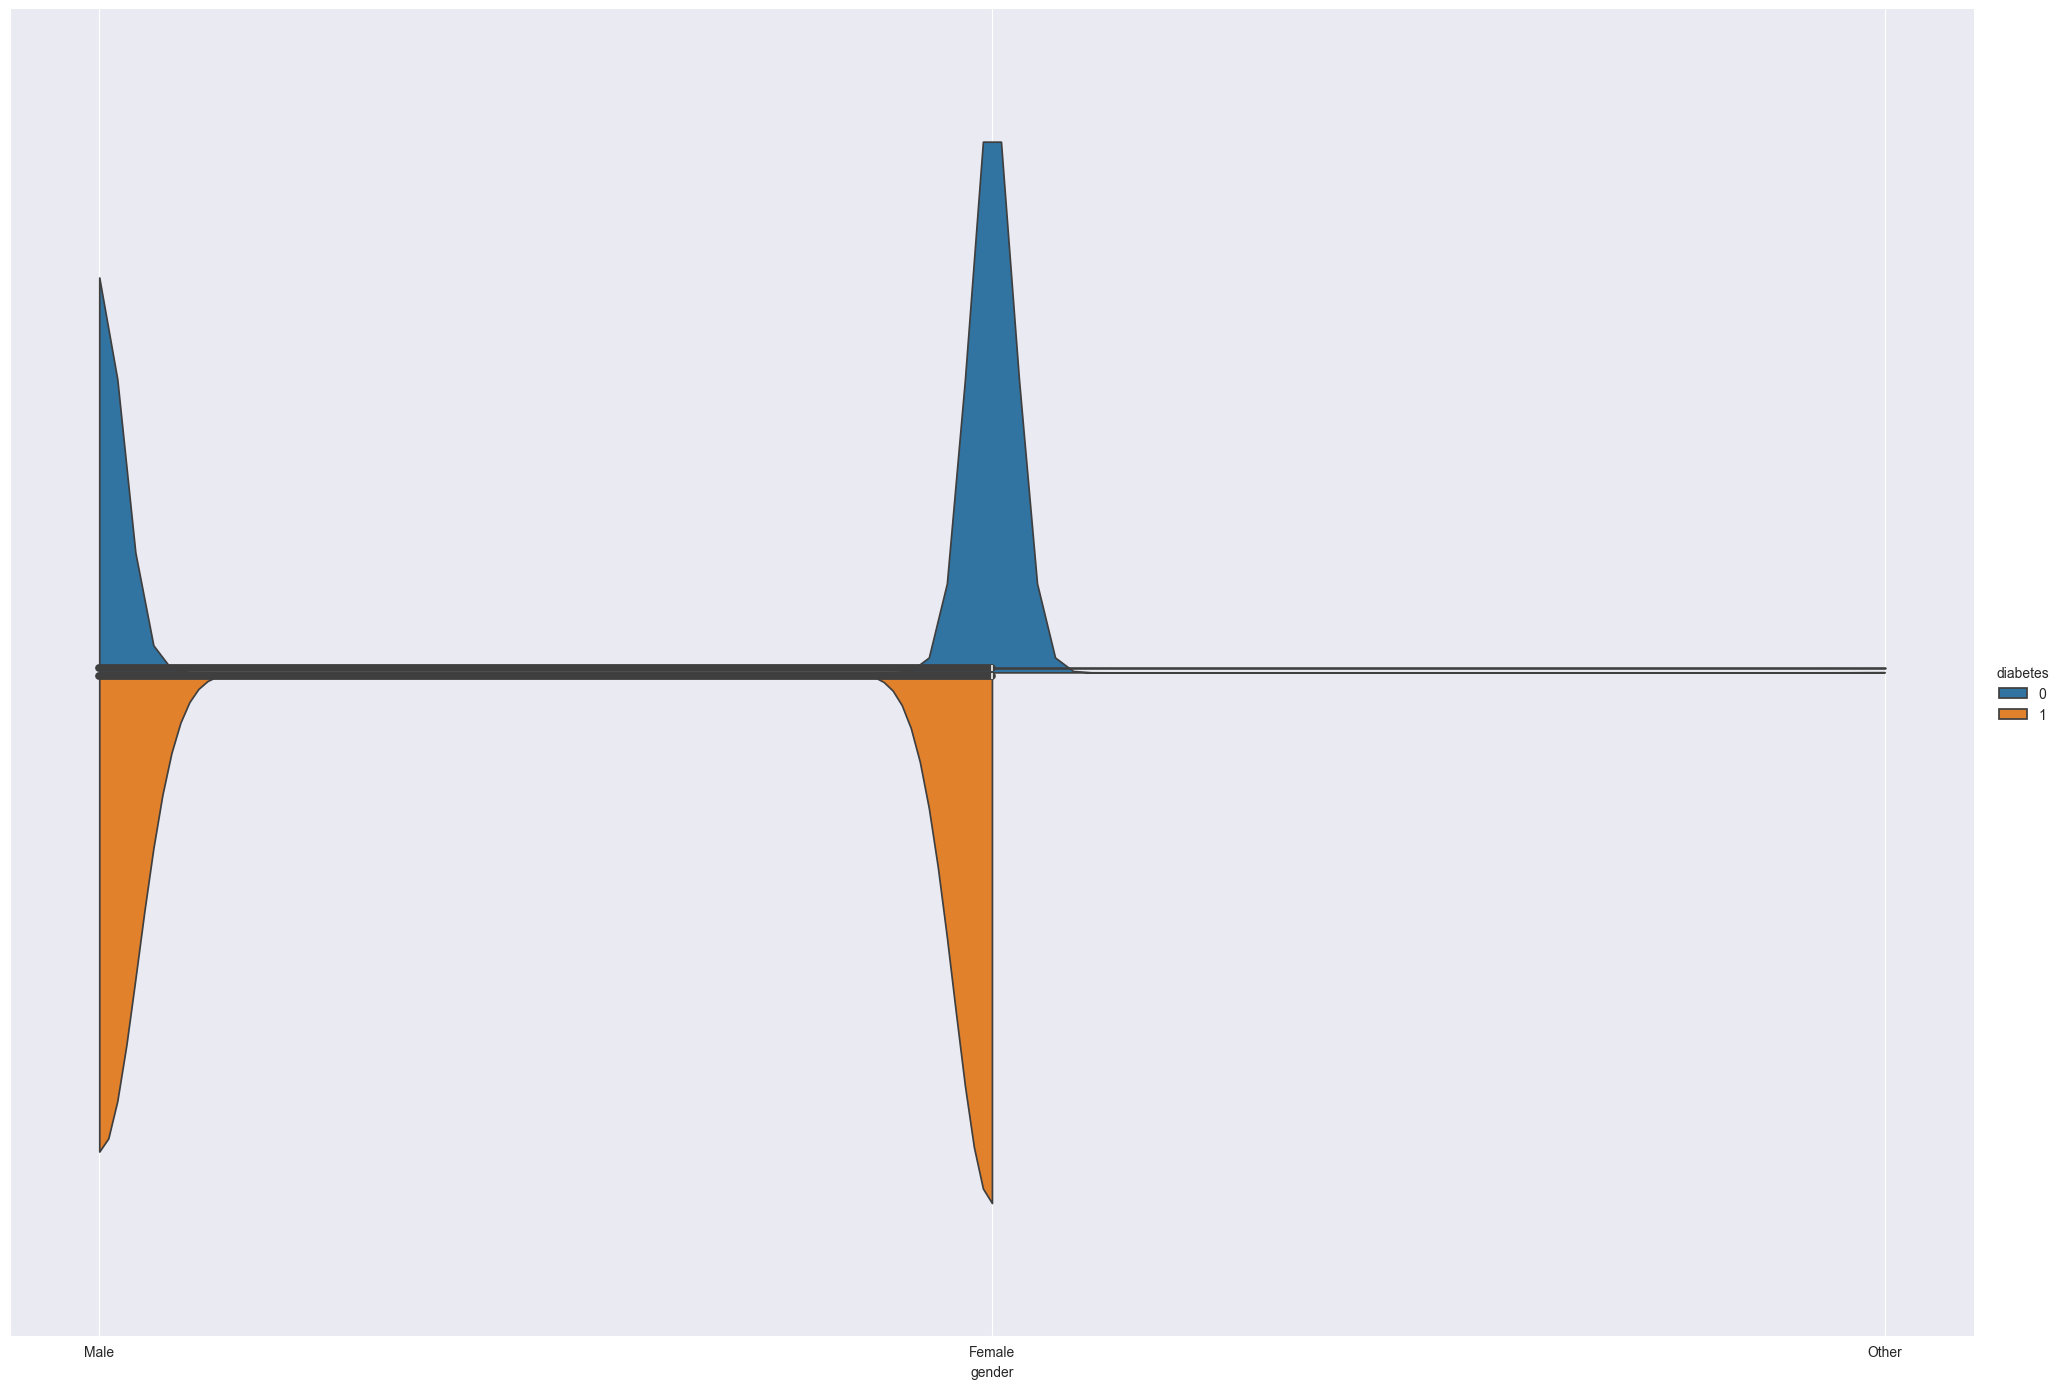

In [9]:
#  Added Violin
df_for_sns = pd.concat([X_train,pd.DataFrame(y_train)], axis=1)
sns.catplot(
    data=df_for_sns, hue="diabetes", x="gender",
    kind="violin", bw_adjust=.5, cut=0, split=True, height=14, aspect=20/14
)

In [10]:
num_cols= list(X_train.select_dtypes(exclude=['object']).columns)
num_cols

['age',
 'hypertension',
 'heart_disease',
 'bmi',
 'HbA1c_level',
 'blood_glucose_level']

In [11]:
cat_cols = list(X_train.select_dtypes(include=['object']).columns)
cat_cols

['gender', 'smoking_history']

In [12]:
model = XGBClassifier()

In [13]:
# write a pipline for the model with smote


numerical = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer()),
    #("Imputer", KNNImputer()),
    ('Scaler', StandardScaler())
])

categorical = Pipeline(steps=[
    ("SimpleImputer", SimpleImputer(strategy='constant')),
    ("OneHotEncoder", OneHotEncoder(handle_unknown='ignore', #drop=['first', 'if_binary'],
                                    sparse_output=False))
])

ct = ColumnTransformer([
    ("numerical", numerical, num_cols),
    ("categorical", categorical, cat_cols)
], remainder = 'passthrough')


pipe = Pipeline(steps=[
    ("ct", ct),
    ("SMOTE", SMOTE()),
    ("Imputer", KNNImputer()),
    ("XGBClassifier", XGBClassifier())
])

In [14]:
counter = 0

In [16]:
counter += 1
def gridsearch_replacment(trial):

    params = {
        'XGBClassifier__n_estimators': trial.suggest_int('XGBClassifier__n_estimators', 1, 100) ,
        'XGBClassifier__learning_rate': trial.suggest_float('XGBClassifier__learning_rate', 0.01, 0.1),
        'XGBClassifier__max_depth': trial.suggest_int('XGBClassifier__max_depth', 5, 15),
        'XGBClassifier__gamma': trial.suggest_int('XGBClassifier__gamma', 1, 6),

    }

    pipe.set_params(**params)
    score = cross_val_score(pipe, X_train, y_train, cv=5, scoring = 'f1_macro').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(gridsearch_replacment, n_trials=100)

[I 2024-02-13 20:22:52,847] A new study created in memory with name: no-name-8a72044d-43f6-4ce7-91af-bae3602b4e57
[I 2024-02-13 20:22:54,571] Trial 0 finished with value: 0.8206759593071487 and parameters: {'XGBClassifier__n_estimators': 21, 'XGBClassifier__learning_rate': 0.07803111185995036, 'XGBClassifier__max_depth': 10, 'XGBClassifier__gamma': 2}. Best is trial 0 with value: 0.8206759593071487.
[I 2024-02-13 20:22:57,276] Trial 1 finished with value: 0.8850397945308852 and parameters: {'XGBClassifier__n_estimators': 73, 'XGBClassifier__learning_rate': 0.073864066386208, 'XGBClassifier__max_depth': 13, 'XGBClassifier__gamma': 2}. Best is trial 1 with value: 0.8850397945308852.
[I 2024-02-13 20:22:59,676] Trial 2 finished with value: 0.8801579709919076 and parameters: {'XGBClassifier__n_estimators': 95, 'XGBClassifier__learning_rate': 0.06484329154961432, 'XGBClassifier__max_depth': 8, 'XGBClassifier__gamma': 5}. Best is trial 1 with value: 0.8850397945308852.
[I 2024-02-13 20:23:01

In [17]:
study.best_value

0.8894557330628896

In [18]:
with mlflow.start_run(run_name=f'{counter}_experiment'): # Add MLflow
    st_b = study.best_params
    mlflow.log_params(st_b)
    stud_bv = study.best_value
    

    pipe.set_params(**st_b)
    pipe.fit(X_train, y_train)
    mlflow.sklearn.log_model(pipe,'best_model_metrics')

    pred_test = pipe.predict(X_test)
    f1_test = f1_score(pred_test, y_test, average='macro')
    

    log_sum = {'f1_macro_cv5': stud_bv,
               'f1_score_macro': f1_test}

    mlflow.log_metrics(log_sum)

In [19]:
stud_bv

0.8894557330628896

In [20]:
st_b

{'XGBClassifier__n_estimators': 85,
 'XGBClassifier__learning_rate': 0.08933894431959605,
 'XGBClassifier__max_depth': 12,
 'XGBClassifier__gamma': 4}

In [21]:
erorr_xtest= f1_score(pred_test, y_test)
erorr_xtest

0.7888819487820112

In [22]:
import fastapi
fastapi.__version__

'0.104.1'

In [23]:
import mlflow
logged_model = 'runs:/4af875e020b2413186d407ea645ccc09/best_model_metrics'

# Load model as a PyFuncModel.
loaded_model = mlflow.sklearn.load_model(logged_model)

# Predict on a Pandas DataFrame.
import pandas as pd
loaded_model.predict(pd.DataFrame(data))

array([0, 0, 0, ..., 0, 0, 0])

In [24]:
dump(pipe, 'bestmodel.joblib')

['bestmodel.joblib']

In [25]:
joblib.load('bestmodel.joblib')

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('categorical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('OneHotEncod...
                               feature_types=None, gamma=4, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.08933894431959605, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=12,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=85,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [26]:
loaded_model

Pipeline(steps=[('ct',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numerical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'hypertension',
                                                   'heart_disease', 'bmi',
                                                   'HbA1c_level',
                                                   'blood_glucose_level']),
                                                 ('categorical',
                                                  Pipeline(steps=[('SimpleImputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('OneHotEncod...
                               feature_types=None, gamma=5, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.07972970456762, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=11,
                               max_leaves=None, min_child_weight=None,
                               missing=nan, monotone_constraints=None,
                               multi_strategy=None, n_estimators=90,
                               n_jobs=None, num_parallel_tree=None,
                               random_state=None, ...))])

In [27]:
X_test.to_csv('X_test.csv', index=False)

In [28]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
94797,Female,50.0,0,0,current,27.32,6.6,155
55359,Male,20.0,0,0,never,19.58,5.0,126
88364,Male,31.0,0,0,No Info,27.32,6.6,130
93804,Female,12.0,0,0,No Info,27.32,4.8,126
65036,Male,70.0,0,1,never,27.65,6.6,280
...,...,...,...,...,...,...,...,...
84904,Male,26.0,0,0,never,27.32,6.6,158
89497,Female,44.0,1,0,never,33.59,6.6,145
25305,Female,20.0,0,0,never,26.00,5.0,126
49389,Female,42.0,0,0,ever,25.78,5.0,155


In [29]:
with open('X_test.csv','rb') as file:
    files={'file':file}
    response=requests.post(url='http://127.0.0.1:8004/predict', files=files)
response

<Response [200]>

In [30]:
# added response
response.text

'{"predict":[0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0

In [31]:
data_predict=pd.DataFrame(response.json())
data_predict.dtypes

predict    int64
dtype: object

In [32]:
error=f1_score(y_test.reset_index(drop=True),data_predict['predict'])
error

0.7888819487820112

In [33]:
data_predict

,predict
0,0
1,0
2,0
3,0
4,1
...,...
19995,0
19996,0
19997,0
19998,0


In [34]:
X_test

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
94797,Female,50.0,0,0,current,27.32,6.6,155
55359,Male,20.0,0,0,never,19.58,5.0,126
88364,Male,31.0,0,0,No Info,27.32,6.6,130
93804,Female,12.0,0,0,No Info,27.32,4.8,126
65036,Male,70.0,0,1,never,27.65,6.6,280
...,...,...,...,...,...,...,...,...
84904,Male,26.0,0,0,never,27.32,6.6,158
89497,Female,44.0,1,0,never,33.59,6.6,145
25305,Female,20.0,0,0,never,26.00,5.0,126
49389,Female,42.0,0,0,ever,25.78,5.0,155


In [35]:
y_test

94797    0
55359    0
88364    0
93804    0
65036    1
        ..
84904    0
89497    0
25305    0
49389    0
36283    0
Name: diabetes, Length: 20000, dtype: int64

In [36]:
Data_X=pd.read_csv('X_test.csv')

In [37]:
Data_X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,50.0,0,0,current,27.32,6.6,155
1,Male,20.0,0,0,never,19.58,5.0,126
2,Male,31.0,0,0,No Info,27.32,6.6,130
3,Female,12.0,0,0,No Info,27.32,4.8,126
4,Male,70.0,0,1,never,27.65,6.6,280
...,...,...,...,...,...,...,...,...
19995,Male,26.0,0,0,never,27.32,6.6,158
19996,Female,44.0,1,0,never,33.59,6.6,145
19997,Female,20.0,0,0,never,26.00,5.0,126
19998,Female,42.0,0,0,ever,25.78,5.0,155


In [38]:
Data_X.to_dict(orient='list')

{'gender': ['Female',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Female',
  'Male',
  'Female',
  'Female',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Male',
  'Female',
  'Female',
  'Male',
  'Male',
  'Male',
  'Female',
  'Male',
  'Male',
  'Male',
  'Male',
  'Female',
  'Female',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Male',
  'Male',
  'Male',
  'Female',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Male',
  'Female',
  'Female',
  'Female',
  'Female',
  'Female',
  'Male',
  'Male',
  'Male',
  'Female',
  'Female',
  'Male',
  'Male',
  'Female',
  'Female',
  'Female',
  'Male',
  'Female',
  'Male',
  'Male',
  'Male',
  'Female',
  'Female',
  'Female',
  'Male',


In [39]:
pd.DataFrame(Data_X.to_dict(orient='list'))

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,50.0,0,0,current,27.32,6.6,155
1,Male,20.0,0,0,never,19.58,5.0,126
2,Male,31.0,0,0,No Info,27.32,6.6,130
3,Female,12.0,0,0,No Info,27.32,4.8,126
4,Male,70.0,0,1,never,27.65,6.6,280
...,...,...,...,...,...,...,...,...
19995,Male,26.0,0,0,never,27.32,6.6,158
19996,Female,44.0,1,0,never,33.59,6.6,145
19997,Female,20.0,0,0,never,26.00,5.0,126
19998,Female,42.0,0,0,ever,25.78,5.0,155


In [40]:
Data_X

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,50.0,0,0,current,27.32,6.6,155
1,Male,20.0,0,0,never,19.58,5.0,126
2,Male,31.0,0,0,No Info,27.32,6.6,130
3,Female,12.0,0,0,No Info,27.32,4.8,126
4,Male,70.0,0,1,never,27.65,6.6,280
...,...,...,...,...,...,...,...,...
19995,Male,26.0,0,0,never,27.32,6.6,158
19996,Female,44.0,1,0,never,33.59,6.6,145
19997,Female,20.0,0,0,never,26.00,5.0,126
19998,Female,42.0,0,0,ever,25.78,5.0,155


In [41]:
response=requests.post(url='http://127.0.0.1:8004/predict_list', json=Data_X.to_dict(orient='list'))
response

<Response [200]>

In [42]:
Data_X.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level'],
      dtype='object')